In this Deep Learning project, we will build a model for the classification of traffic signs available in the image into many categories using a convolutional neural network(CNN) and Keras library.

Dataset for Traffic Sign Recognition
The image dataset is consists of more than 50,000 pictures of various traffic signs(speed limit, crossing, traffic signals, etc.) Around 43 different classes are present in the dataset for image classification. The dataset classes vary in size like some class has very few images while others have a vast number of images. The dataset doesn’t take much time and space to download as the file size is around 314.36 MB. It contains two separate folders, train and test, where the train folder is consists of classes, and every category contains various images.

Dataset link: https://www.kaggle.com/datasets/meowmeowmeowmeowmeow/gtsrb-german-traffic-sign

In [ ]:
!pip install tensorflow
!pip install tensorflow keras
!pip install tensorflow matplotlib
!pip install tensorflow pandas

In [ ]:
pip install --upgrade pip

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 10.0 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 23.1.2
    Uninstalling pip-23.1.2:
      Successfully uninstalled pip-23.1.2


In [ ]:
pip install scikit-learn

In [ ]:
pip install tensorflow

In [ ]:
pip install tensorflow Pillow



> Workflow
We need to follow the below 4 steps to build our traffic sign classification model:

Dataset exploration
CNN model building
Model training and validation
Model testing



Dataset exploration
Around 43 subfolders(ranging from 0 to 42) are available in our ‘train’ folder, and each subfolder represents a different class. We have an OS module that helps in the iteration of all the images with their respective classes and labels. To open the contents of ideas into an array, we are using the PIL library.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from PIL import Image
import os
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

In [ ]:
from google.colab import files

# Upload the Kaggle API key file
uploaded = files.upload()


Saving kaggle.json to kaggle (2).json


In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d meowmeowmeowmeowmeow/gtsrb-german-traffic-sign --force

100% 610M/612M [00:28<00:00, 23.6MB/s]
100% 612M/612M [00:28<00:00, 22.8MB/s]


In [ ]:
!unzip -q gtsrb-german-traffic-sign.zip -d gtsrb-german-traffic-sign

replace gtsrb-german-traffic-sign/Meta.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
!ls /content/gtsrb-german-traffic-sign

meta  Meta  Meta.csv  test  Test  Test.csv  traffic_classifier.h5  train  Train  Train.csv


In [ ]:
import pandas as pd

# Load and display the contents of Test.csv
test_csv_path = '/content/gtsrb-german-traffic-sign/Test.csv'
test_data = pd.read_csv(test_csv_path)
print(test_data)

       Width  Height  Roi.X1  Roi.Y1  Roi.X2  Roi.Y2  ClassId            Path
0         53      54       6       5      48      49       16  Test/00000.png
1         42      45       5       5      36      40        1  Test/00001.png
2         48      52       6       6      43      47       38  Test/00002.png
3         27      29       5       5      22      24       33  Test/00003.png
4         60      57       5       5      55      52       11  Test/00004.png
...      ...     ...     ...     ...     ...     ...      ...             ...
12625     42      41       5       6      37      36       12  Test/12625.png
12626     50      51       6       5      45      46       33  Test/12626.png
12627     29      29       6       6      24      24        6  Test/12627.png
12628     48      49       5       6      43      44        7  Test/12628.png
12629     32      31       6       5      27      26       10  Test/12629.png

[12630 rows x 8 columns]


In [ ]:
!ls /content/gtsrb-german-traffic-sign/train

0  10  12  14  16  18  2   21  23  25  27  29  30  32  34  36  38  4   41  5  7  9
1  11  13  15  17  19  20  22  24  26  28  3   31  33  35  37  39  40  42  6  8


In [ ]:
!ls /content/gtsrb-german-traffic-sign/test

00000.png  01579.png  03158.png  04737.png  06316.png  07895.png  09474.png  11053.png
00001.png  01580.png  03159.png  04738.png  06317.png  07896.png  09475.png  11054.png
00002.png  01581.png  03160.png  04739.png  06318.png  07897.png  09476.png  11055.png
00003.png  01582.png  03161.png  04740.png  06319.png  07898.png  09477.png  11056.png
00004.png  01583.png  03162.png  04741.png  06320.png  07899.png  09478.png  11057.png
00005.png  01584.png  03163.png  04742.png  06321.png  07900.png  09479.png  11058.png
00006.png  01585.png  03164.png  04743.png  06322.png  07901.png  09480.png  11059.png
00007.png  01586.png  03165.png  04744.png  06323.png  07902.png  09481.png  11060.png
00008.png  01587.png  03166.png  04745.png  06324.png  07903.png  09482.png  11061.png
00009.png  01588.png  03167.png  04746.png  06325.png  07904.png  09483.png  11062.png
00010.png  01589.png  03168.png  04747.png  06326.png  07905.png  09484.png  11063.png
00011.png  01590.png  03169.png  04748.png 

In [ ]:
!cat /content/gtsrb-german-traffic-sign/test/Test.csv

cat: /content/gtsrb-german-traffic-sign/test/Test.csv: No such file or directory


In [ ]:
!cat /content/gtsrb-german-traffic-sign/train/Train.csv

cat: /content/gtsrb-german-traffic-sign/train/Train.csv: No such file or directory


In [ ]:
!ls /content/gtsrb-german-traffic-sign/test | wc -l

12631


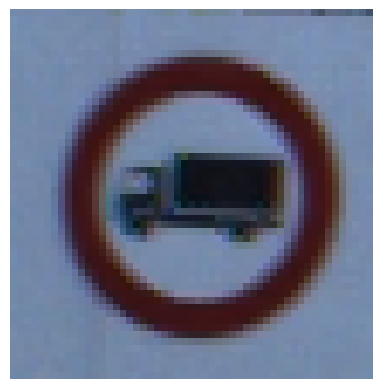

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt

# Specify the path to the image you want to display
image_path = "/content/gtsrb-german-traffic-sign/test/00000.png"

# Open and display the image
image = Image.open(image_path)
plt.imshow(image)
plt.axis('off')  # Turn off axis labels
plt.show()

In [ ]:
import os
import pandas as pd
from PIL import Image
import numpy as np

data = []     # List to store images as NumPy arrays
labels = []   # List to store corresponding class labels
image_names = []  # List to store image file names
classes = 43   # Total number of classes
cur_path = os.getcwd()  # Get the current working directory

# Iterate through each class
for i in range(classes):
    # Construct the path to the directory for the current class
    class_path = os.path.join(cur_path, 'gtsrb-german-traffic-sign', 'train', str(i))

    # List all image files in the current class directory
    image_files = os.listdir(class_path)

    # Iterate through each image in the current class
    for image_name in image_files:
        try:
            # Construct the full path to the image file
            image_path = os.path.join(class_path, image_name)

            # Open the image file
            image = Image.open(image_path)

            # Resize the image to 30x30 pixels
            image = image.resize((30, 30))

            # Convert the image to a NumPy array
            image = np.array(image)

            # Append the image, its corresponding label, and the image name to the lists
            data.append(image)
            labels.append(i)
            image_names.append(image_name)
        except Exception as e:
            print(f"Error processing image: {image_path}")
            print(f"Error details: {e}")

# Additional checks and prints
print("Number of loaded images:", len(data))
print("Number of loaded labels:", len(labels))
print("Number of loaded image names:", len(image_names))

Number of loaded images: 39209
Number of loaded labels: 39209
Number of loaded image names: 39209


In [ ]:
# Convert the lists to NumPy arrays
data = np.array(data)
labels = np.array(labels)

In [ ]:
# Create a DataFrame to check the loaded data
df = pd.DataFrame({'File': image_names, 'Label': labels})
print(df.head())

                    File  Label
0  00000_00004_00005.png      0
1  00000_00006_00007.png      0
2  00000_00003_00005.png      0
3  00000_00003_00020.png      0
4  00000_00000_00007.png      0


In the end, we have to store every image with its corresponding labels into lists. A NumPy array is needed to feed the data to the model, so we convert this list into an array. Now, the shape of our data is (39209, 30, 30, 3), where 39209 represents the number of images, 30*30 represents the image sizes into pixels, and the last 3 represents the RGB value(availability of coloured data).

In [ ]:
print(data.shape, labels.shape)

(39209, 30, 30, 3) (39209,)


In [ ]:
#Splitting training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(31367, 30, 30, 3) (7842, 30, 30, 3) (31367,) (7842,)


In [ ]:
#Converting the labels into one hot encoding
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)

CNN model building
We build a CNN model to classify the images into their respective categories.

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dropout, Flatten, Dense

# Building the model
model = Sequential()

# Convolutional layers
model.add(Conv2D(filters=32, kernel_size=(5, 5), activation='relu', input_shape=(30, 30, 3)))
model.add(Conv2D(filters=32, kernel_size=(5, 5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))

model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))

# Fully connected layers
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation='softmax'))

# Compilation of the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Display the model summary
model.summary()

model.save('/content/gtsrb-german-traffic-sign/traffic_classifier.h5')



Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_28 (Conv2D)          (None, 26, 26, 32)        2432      
                                                                 
 conv2d_29 (Conv2D)          (None, 22, 22, 32)        25632     
                                                                 
 max_pooling2d_14 (MaxPooli  (None, 11, 11, 32)        0         
 ng2D)                                                           
                                                                 
 dropout_21 (Dropout)        (None, 11, 11, 32)        0         
                                                                 
 conv2d_30 (Conv2D)          (None, 9, 9, 64)          18496     
                                                                 
 conv2d_31 (Conv2D)          (None, 7, 7, 64)          36928     
                                                      

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
# Training the model
eps = 100
history = model.fit(X_train, y_train, batch_size=32, epochs=eps, validation_data=(X_test, y_test))

Epoch 1/100
981/981 [==============================] - 9s 6ms/step - loss: 2.0722 - accuracy: 0.4778 - val_loss: 0.7268 - val_accuracy: 0.8194
Epoch 2/100
981/981 [==============================] - 7s 7ms/step - loss: 0.8441 - accuracy: 0.7520 - val_loss: 0.2808 - val_accuracy: 0.9189
Epoch 3/100
981/981 [==============================] - 6s 6ms/step - loss: 0.5095 - accuracy: 0.8536 - val_loss: 0.1815 - val_accuracy: 0.9532
Epoch 4/100
981/981 [==============================] - 7s 7ms/step - loss: 0.3800 - accuracy: 0.8911 - val_loss: 0.1307 - val_accuracy: 0.9615
Epoch 5/100
981/981 [==============================] - 6s 6ms/step - loss: 0.3165 - accuracy: 0.9105 - val_loss: 0.0835 - val_accuracy: 0.9774
Epoch 6/100
981/981 [==============================] - 7s 7ms/step - loss: 0.2754 - accuracy: 0.9202 - val_loss: 0.0795 - val_accuracy: 0.9795
Epoch 7/100
981/981 [==============================] - 6s 6ms/step - loss: 0.2618 - accuracy: 0.9263 - val_loss: 0.0671 - val_accuracy: 0.9809

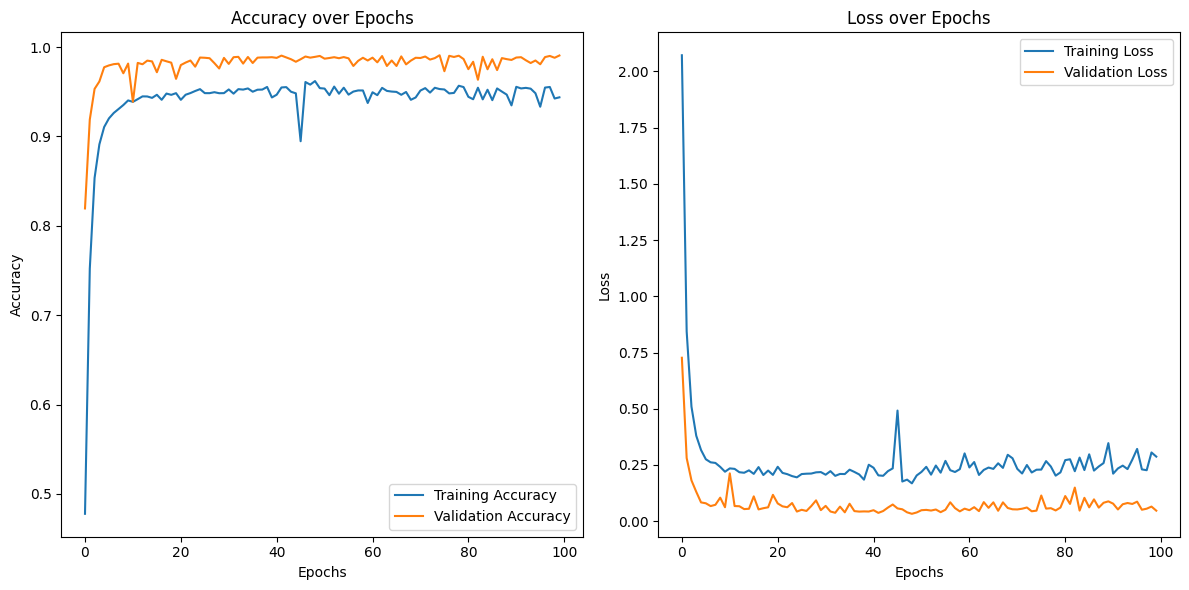

In [ ]:
import matplotlib.pyplot as plt

# Plotting graphs for accuracy
plt.figure(figsize=(12, 6))

# Plot training and validation accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot training and validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


Model testing
A folder named” test” is available in our dataset; inside that, we got the main working comma-separated file called” test.csv”. It comprises two things, the image paths, and their respective class labels. We can use the pandas’ python library to extract the image path with corresponding labels. Next, we need to resize our images to 30×30 pixels to predict the model and create a numpy array filled with image data. To understand how the model predicts the actual labels, we need to import accuracy_score from the sklearn.metrics. At last, we are calling the Keras model.save() method to keep our trained model.

In [ ]:
from sklearn.metrics import accuracy_score
from PIL import Image
import numpy as np
import pandas as pd

# Load test labels and image paths from Test.csv
test_data = pd.read_csv('/content/gtsrb-german-traffic-sign/Test.csv')
labels = test_data["ClassId"].values
imgs = test_data["Path"].values

# Resize images to 30x30 pixels and create a numpy array
data = []
for img in imgs:
    image_path = os.path.join('/content/gtsrb-german-traffic-sign', img)
    image = Image.open(image_path)
    image = image.resize((30, 30))
    data.append(np.array(image))

X_test = np.array(data)

# Predict probabilities for each class using the trained model
pred_probabilities = model.predict(X_test)

# Get the class indices with the highest probability for each sample
pred = np.argmax(pred_probabilities, axis=1)

# Calculate and print the accuracy with the test data
accuracy = accuracy_score(labels, pred)
print("Accuracy on the test dataset:", accuracy)


395/395 [==============================] - 1s 3ms/step
Accuracy on the test dataset: 0.9550277117973079


GUI for Traffic Signs Classifier
 build a graphical user interface(GUI) for our traffic signs recognizer. We need to create a separate python file named” gui.py” for this purpose. Firstly, we need to load our trained model ‘traffic_classifier.h5’ with the Keras library’s help of the deep learning technique. After that, we build the GUI to upload images and a classifier button to determine which class our image belongs. We create classify() function for this purpose; whence we click on the GUI button, this function is called implicitly. To predict the traffic sign, we need to provide the same resolutions of shape we used at the model training time. So, in the classify() method, we convert the image into the dimension of shape (1 * 30 * 30 * 3). The model.predict_classes(image) function is used for image prediction, it returns the class number(0-42) for every image. Then, we can extract the information from the dictionary using this class number.

In [ ]:
import os

# List files in the /content/ directory
files = os.listdir('/content/')
print(files)

['.config', 'gtsrb-german-traffic-sign', 'sample_data']


In [ ]:
import os

# List files in the 'gtsrb-german-traffic-sign' directory
gtsrb_dir = '/content/gtsrb-german-traffic-sign'
contents = os.listdir(gtsrb_dir)
print(contents)

['traffic_classifier.h5']


In [ ]:
!zip -r /content/test_data.zip /content/gtsrb-german-traffic-sign/test

Streaming output truncated to the last 5000 lines.
  adding: content/gtsrb-german-traffic-sign/test/10941.png (stored 0%)
  adding: content/gtsrb-german-traffic-sign/test/07707.png (stored 0%)
  adding: content/gtsrb-german-traffic-sign/test/06713.png (stored 0%)
  adding: content/gtsrb-german-traffic-sign/test/10590.png (stored 0%)
  adding: content/gtsrb-german-traffic-sign/test/02069.png (stored 0%)
  adding: content/gtsrb-german-traffic-sign/test/03537.png (stored 0%)
  adding: content/gtsrb-german-traffic-sign/test/04462.png (stored 0%)
  adding: content/gtsrb-german-traffic-sign/test/07136.png (stored 0%)
  adding: content/gtsrb-german-traffic-sign/test/03372.png (stored 0%)
  adding: content/gtsrb-german-traffic-sign/test/08871.png (deflated 1%)
  adding: content/gtsrb-german-traffic-sign/test/03763.png (stored 0%)
  adding: content/gtsrb-german-traffic-sign/test/03066.png (stored 0%)
  adding: content/gtsrb-german-traffic-sign/test/09429.png (stored 0%)
  adding: content/gtsrb-

In [ ]:
files.download('/content/test_data.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Saving 00034.png to 00034.png
1/1 [==============================] - 0s 113ms/step


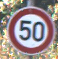

Predicted Traffic Sign:  Speed limit (120km/h)


In [ ]:
from google.colab import files
import numpy as np
from tensorflow.keras.models import load_model
from PIL import Image, ImageTk
import matplotlib.pyplot as plt
import io
from IPython.display import display


# Load the trained model to classify signs
model = load_model('/content/gtsrb-german-traffic-sign/traffic_classifier.h5')

# Dictionary to label all traffic signs class.
classes = { 1:'Speed limit (20km/h)',
           2:'Speed limit (30km/h)',
           3:'Speed limit (50km/h)',
           4:'Speed limit (60km/h)',
           5:'Speed limit (70km/h)',
           6:'Speed limit (80km/h)',
           7:'End of speed limit (80km/h)',
           8:'Speed limit (100km/h)',
           9:'Speed limit (120km/h)',
           10:'No passing',
           11:'No passing veh over 3.5 tons',
           12:'Right-of-way at intersection',
           13:'Priority road',
           14:'Yield',
           15:'Stop',
           16:'No vehicles',
           17:'Veh > 3.5 tons prohibited',
           18:'No entry',
           19:'General caution',
           20:'Dangerous curve left',
           21:'Dangerous curve right',
           22:'Double curve',
           23:'Bumpy road',
           24:'Slippery road',
           25:'Road narrows on the right',
           26:'Road work',
           27:'Traffic signals',
           28:'Pedestrians',
           29:'Children crossing',
           30:'Bicycles crossing',
           31:'Beware of ice/snow',
           32:'Wild animals crossing',
           33:'End speed + passing limits',
           34:'Turn right ahead',
           35:'Turn left ahead',
           36:'Ahead only',
           37:'Go straight or right',
           38:'Go straight or left',
           39:'Keep right',
           40:'Keep left',
           41:'Roundabout mandatory',
           42:'End of no passing',
           43:'End no passing vehicle with a weight greater than 3.5 tons' }


def classify(image):
    image = image.resize((30, 30))
    image = np.expand_dims(image, axis=0)
    image = np.array(image)

    # Use predict method to get class probabilities
    pred_probabilities = model.predict(image)

    # Find the index of the class with the highest probability
    pred_class_index = np.argmax(pred_probabilities)

    # Get the corresponding traffic sign label
    sign = classes[pred_class_index + 1]

    return sign

# Upload image file
uploaded = files.upload()

# Get the file path
file_path = list(uploaded.keys())[0]

# Read the image using PIL
image = Image.open(io.BytesIO(uploaded[file_path]))

# Perform classification
predicted_sign = classify(image)

# Display the image and prediction
display(image)
print("Predicted Traffic Sign: ", predicted_sign)